In [7]:
import capellambse
#path_to_model = "../../../tests/data/melodymodel/5_0/Melody Model Test.aird"
path_to_model = "./capella/HUBBLESpaceTelescope/HUBBLESpaceTelescope.aird"
#path_to_model = "./capella/HUBBLESpaceTelescope/HUBBLE Space Telescope (CAPELLA DAYS 2021)-20231030_1535.aird"
model_capella = capellambse.MelodyModel(path_to_model)
model_capella

Cannot load PVMT extension: ValueError: Provided model does not have a PropertyValuePkg
Property values are not available in this model


In [13]:
from capella_analysis_utils import get_neighbors_component_bfs

entities = ["Wide Field Imagery sensor#1"]

MAX_TRIPLES = 15
results = []
for entity in entities:
    max_triples = MAX_TRIPLES // len(entities)
    print(max_triples)
    try: 
        root_component = model_capella.la.all_components.by_name(entity)
    except e: 
        print(e)
        print(entity)
        entities.remove(entity)
        continue
    temp = get_neighbors_component_bfs(root_component, max_triples= max_triples)

    for res in temp[0:max_triples]:
        results.append(res)

definition = ""
for triples in results: 
    definition += "|" + triples[3] +"|" +" " + "|" + triples[4] +"|" +" " +"|"+ triples[5] +"|" + "\n"

print(definition)


15
|Wide Field Imagery sensor#1| |is_contained_by| |Instruments module|
|Wide Field Imagery sensor#1| |constraint| |Wavelength: 115-1050nm|
|Wide Field Imagery sensor#1| |directly_performs| |Provide wide field imagery in visible wavelengths|
|Provide wide field imagery in visible wavelengths| |Optical images| |Align instruments with focal plane|
|Align instruments with focal plane| |is_performed_by| |Focal Plane|
|Provide wide field imagery in visible wavelengths| |Science data| |Manage science data|
|Manage science data| |is_performed_by| |Science&Intrument Control&Data Handling module|
|Instruments module| |directly_contains| |Wide Field Imagery sensor#1|
|Instruments module| |directly_contains| |Spectrograph Imagery sensor|
|Instruments module| |directly_contains| |Wide Field Imagery sensor#2|
|Instruments module| |directly_contains| |Position&Brightness sensor|
|Instruments module| |directly_contains| |Ultra Violet sensor|
|Instruments module| |is_contained_by| |HUBBLE Space Telesc

In [6]:
model_capella.la.all_components

NameError: name 'model_capella' is not defined

Failed converting diagram with <class 'capellambse.model.diagram.PNGFormat'>
Traceback (most recent call last):
  File "/home/paul/miniconda3/envs/llm_updated/lib/python3.9/site-packages/capellambse/model/diagram.py", line 205, in _repr_mimebundle_
    bundle[mime] = conv.convert(render)
  File "/home/paul/miniconda3/envs/llm_updated/lib/python3.9/site-packages/capellambse/model/diagram.py", line 520, in convert
    import cairosvg
ModuleNotFoundError: No module named 'cairosvg'


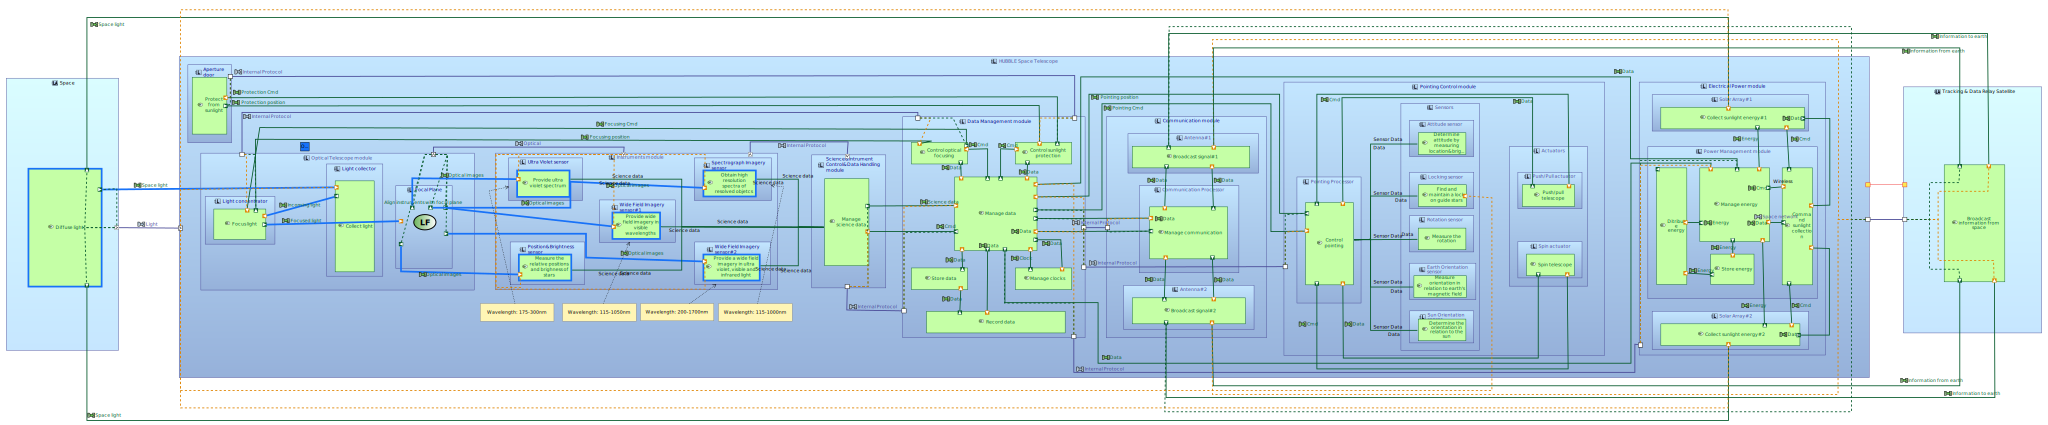

In [3]:
diagram = model.diagrams.by_name('[LAB] Structure')
diagram#.nodes